In [23]:
import json
import numpy as np
import pandas as pd

In [24]:
with open('../EvolutionaryFramework/results/MOEA_D/2023_04_15_19:04:02/result_5.json') as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [25]:
data = []
metaParameters = []
for elem in parsed_json:
    if elem == "metaParameters":
        metaParameters.append({
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverType': parsed_json[elem]["crossoverType"],
            'mutationType': parsed_json[elem]["mutationType"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
            'numberOfNeighbours': parsed_json[elem]["numberOfNeighbours"]
        })
metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                for individual in parsed_json[elem][generation]:
                    dictionary = {}
                    dictionary = {
                        'generation': generation,
                        'melody': individual['melody'],
                    }
                    for criterion in metaParameters_df['criteria'].values[0]:
                        dictionary[criterion] = individual['fitness'][criterion]
                    data.append(dictionary)
data_df = pd.DataFrame(data)

In [26]:
data_df.head()

,generation,melody,STABILITY,TENSION
0,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-285.0,100.0
1,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-295.0,105.0
2,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-295.0,105.0
3,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-320.0,110.0
4,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-200.0,40.0


In [27]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverType,mutationType,mutationProbability,selectionType,matingPoolSelectionType,numberOfGenerations,criteria,numberOfNeighbours
0,MOEA/D,100,4,16,f1,A,MAJOR,ONE_POINT_CROSSOVER,SIMPLE,0.8,,,1000,"[STABILITY, TENSION]",20


In [28]:
data_df.head()

,generation,melody,STABILITY,TENSION
0,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-285.0,100.0
1,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-295.0,105.0
2,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-295.0,105.0
3,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-320.0,110.0
4,generation_101,59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...,-200.0,40.0


In [29]:
data_df.loc[0]

generation                                       generation_101
melody        59/0.0625 59/0.0625 66/0.0625 64/0.0625 66/0.3...
STABILITY                                                -285.0
TENSION                                                   100.0
Name: 0, dtype: object

In [30]:
generation = data_df[data_df["generation"] == "generation_1000"]

In [31]:
list_of_fronts = []
for criterion in metaParameters_df['criteria'].values[0]:
    criterion_individuals = []
    for individual in generation[criterion]:
        criterion_individuals.append(individual)
    list_of_fronts.append(criterion_individuals)


In [32]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

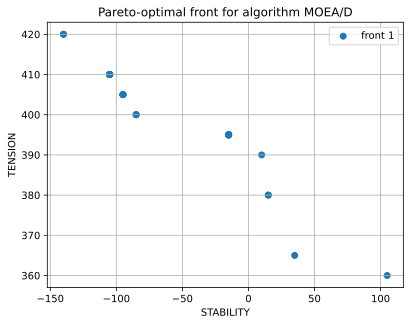

In [33]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm MOEA/D")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()


ax.scatter(list_of_fronts[0], list_of_fronts[1], label = f"front 1")

plt.legend()
plt.show()


In [34]:
from natsort import index_natsorted
list_of_generations = []
data_df = data_df.sort_values(by=['generation'], key = lambda x: np.argsort(index_natsorted(data_df["generation"])))
for generation_name in data_df["generation"].unique():
    list_of_fronts = []
    generation = data_df[data_df["generation"] == generation_name]
    print(generation_name)
    for criterion in metaParameters_df['criteria'].values[0]:
        criterion_individuals = []
        for individual in generation[criterion]:
            criterion_individuals.append(individual)
        list_of_fronts.append(criterion_individuals)
    list_of_generations.append(list_of_fronts)

average_generations = np.zeros((len(list_of_generations), len(metaParameters_df['criteria'].values[0])))

for idx, elem in enumerate(list_of_generations):
    temp = np.zeros(len(metaParameters_df['criteria'].values[0]))
    for i, criterion in enumerate(elem):
        temp[i] = np.average(criterion) 
    average_generations[idx] = temp 

print(average_generations)



generation_1
generation_101
generation_201
generation_301
generation_401
generation_501
generation_601
generation_701
generation_801
generation_901
generation_1000
[[-652.5        -410.625     ]
 [-357.72727273  103.63636364]
 [-253.          190.        ]
 [-191.25        262.5       ]
 [-224.09090909  311.36363636]
 [-126.25        338.125     ]
 [ -14.09090909  346.36363636]
 [   6.78571429  366.42857143]
 [ -28.82352941  390.29411765]
 [ -36.8         395.        ]
 [ -58.          399.71428571]]


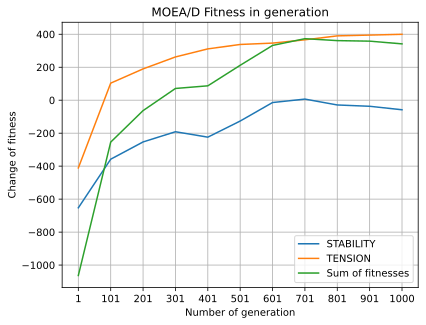

In [51]:
X = data_df["generation"].unique()
for i, elem in enumerate(X):
    X[i] = elem[11:]


fig, ax = plt.subplots()
ax.set_title("MOEA/D Fitness in generation")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):  
    ax.plot(X, average_generations[:,i], label=criterion)
        
ax.plot(X, average_generations[:,0] + average_generations[:,1], label="Sum of fitnesses")

ax.set_xlabel("Number of generation")
ax.set_ylabel("Change of fitness")

ax.grid()

plt.legend()
plt.show()